# Note:- We can use Wine quality dataset and Student Performance Data set as per the discussion in lecture.

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Input Variables(based on physicochemical tests):
* 1. fixed_acidity
* 2. volatile_acidity
* 3. citric_acid
* 4. residual_sugar
* 5. chlorides
* 6. free_sulfur_dioxide
* 7. total_sulfur_dioxide
* 8. density
* 9. pH
* 10. sulphates
* 11. alcohol
* 12. quality

Output variable (based on sensory data): 
* 12 - quality (score between 0 and 10)


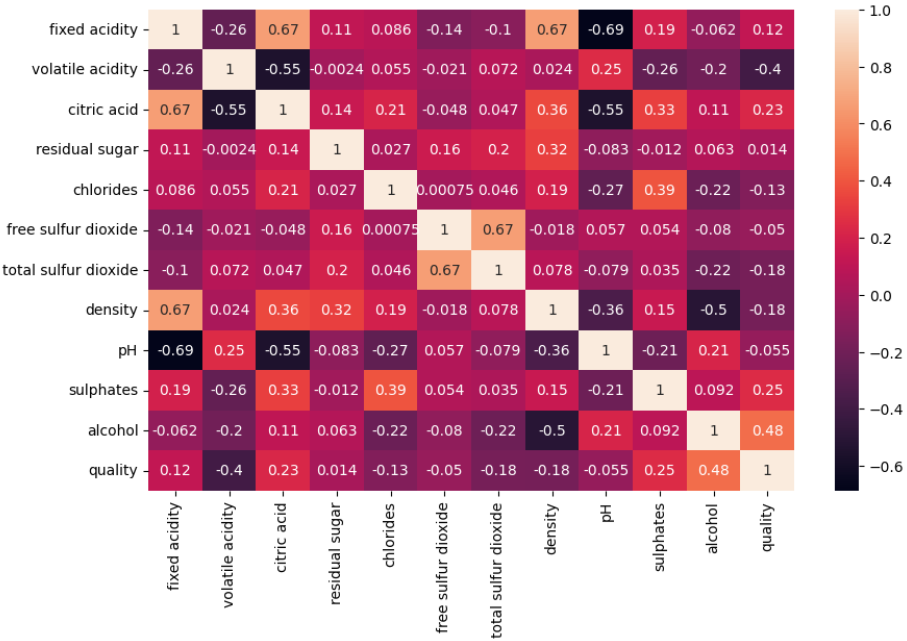

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.


Refer: https://www.kaggle.com/code/azminetoushikwasi/all-imputation-techniques-with-pros-and-cons#4.-Basic-Exploration


There was no missing values in quality column of dataset.

### Advantages and Disadvantages of Mean/Median Imputation
- Advantages

Simple to implement(Robust to outliers)

The faster way to fill the missing values in the complete dataset 

- Disadvantages

Change in the original variance

It impacts the Correlation


### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

- df.isna().sum():  there is no missing values
- df.duplicated().sum(): There are no duplicates values in the dataset
- segrregate numerical and categorical features

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

- # Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])

df['average']=df['total_score']/3

df.head()





### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # clear warning from output

df=pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [8]:
numerical_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [15]:
numerical_features[1]

'volatile acidity'

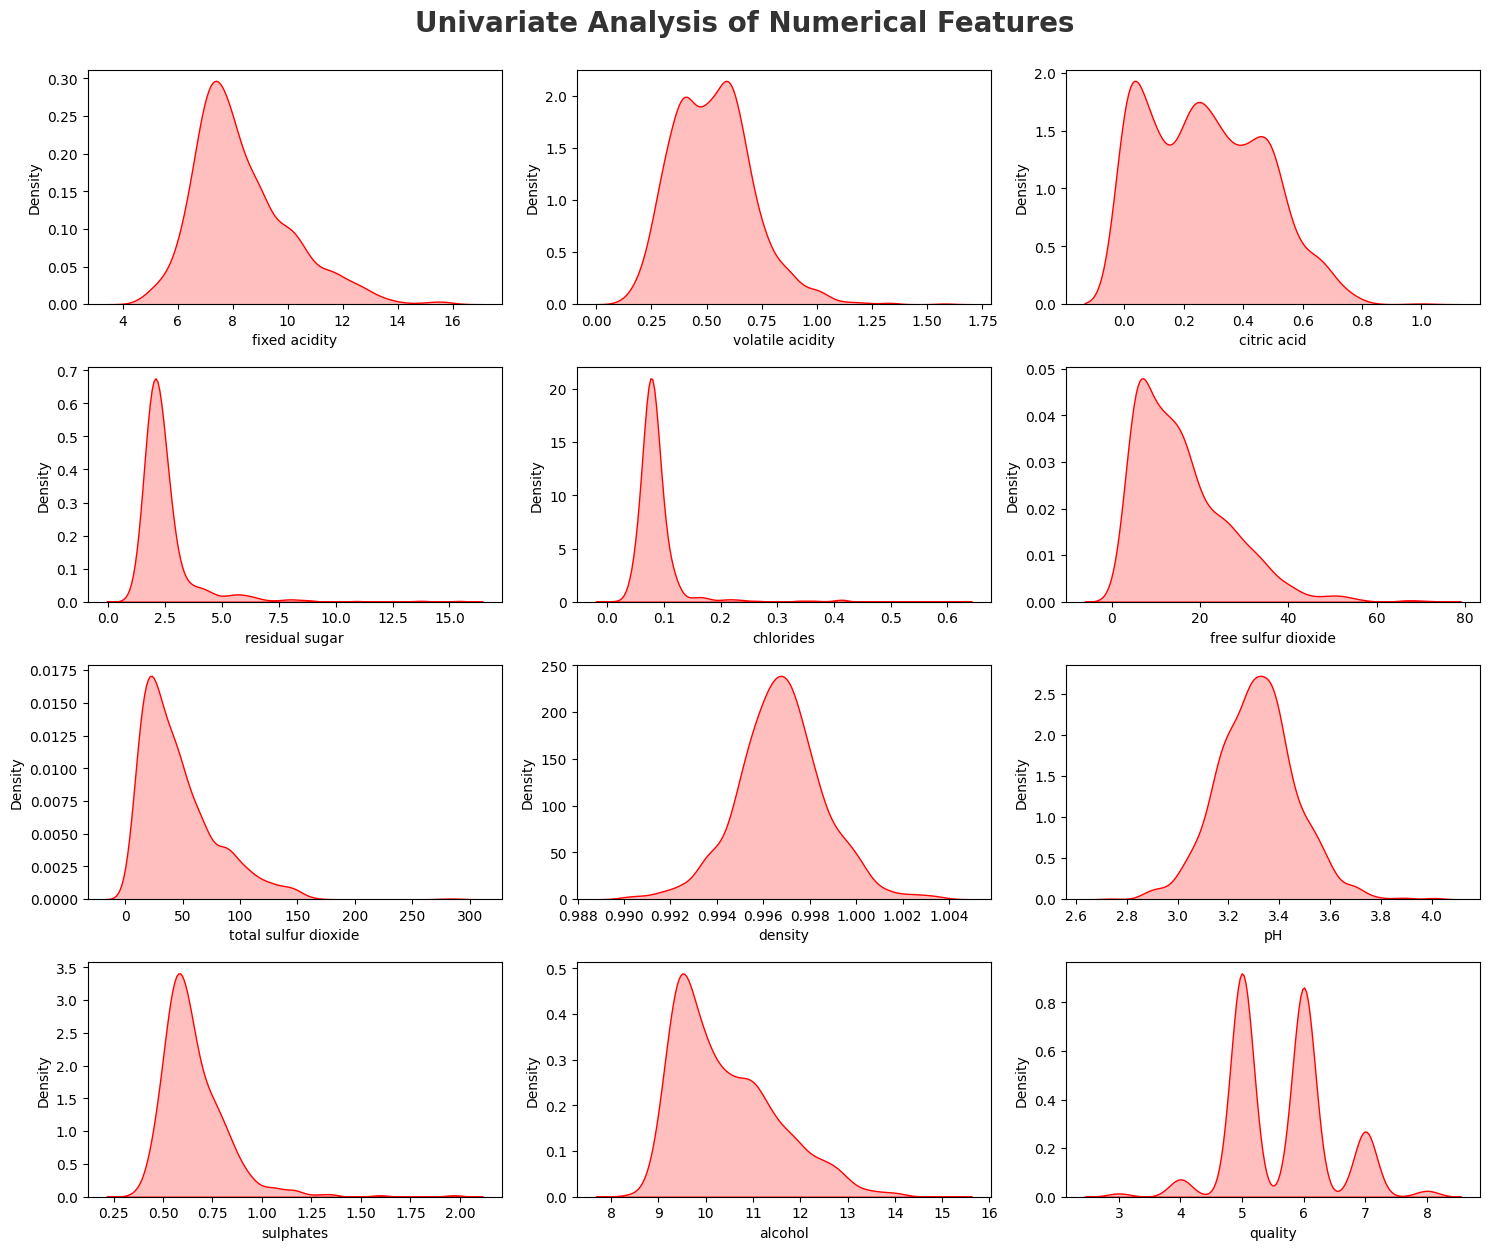

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    mean=statistics.mean(df[numerical_features[i]])
    sd = statistics.stdev(df[numerical_features[i]])
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


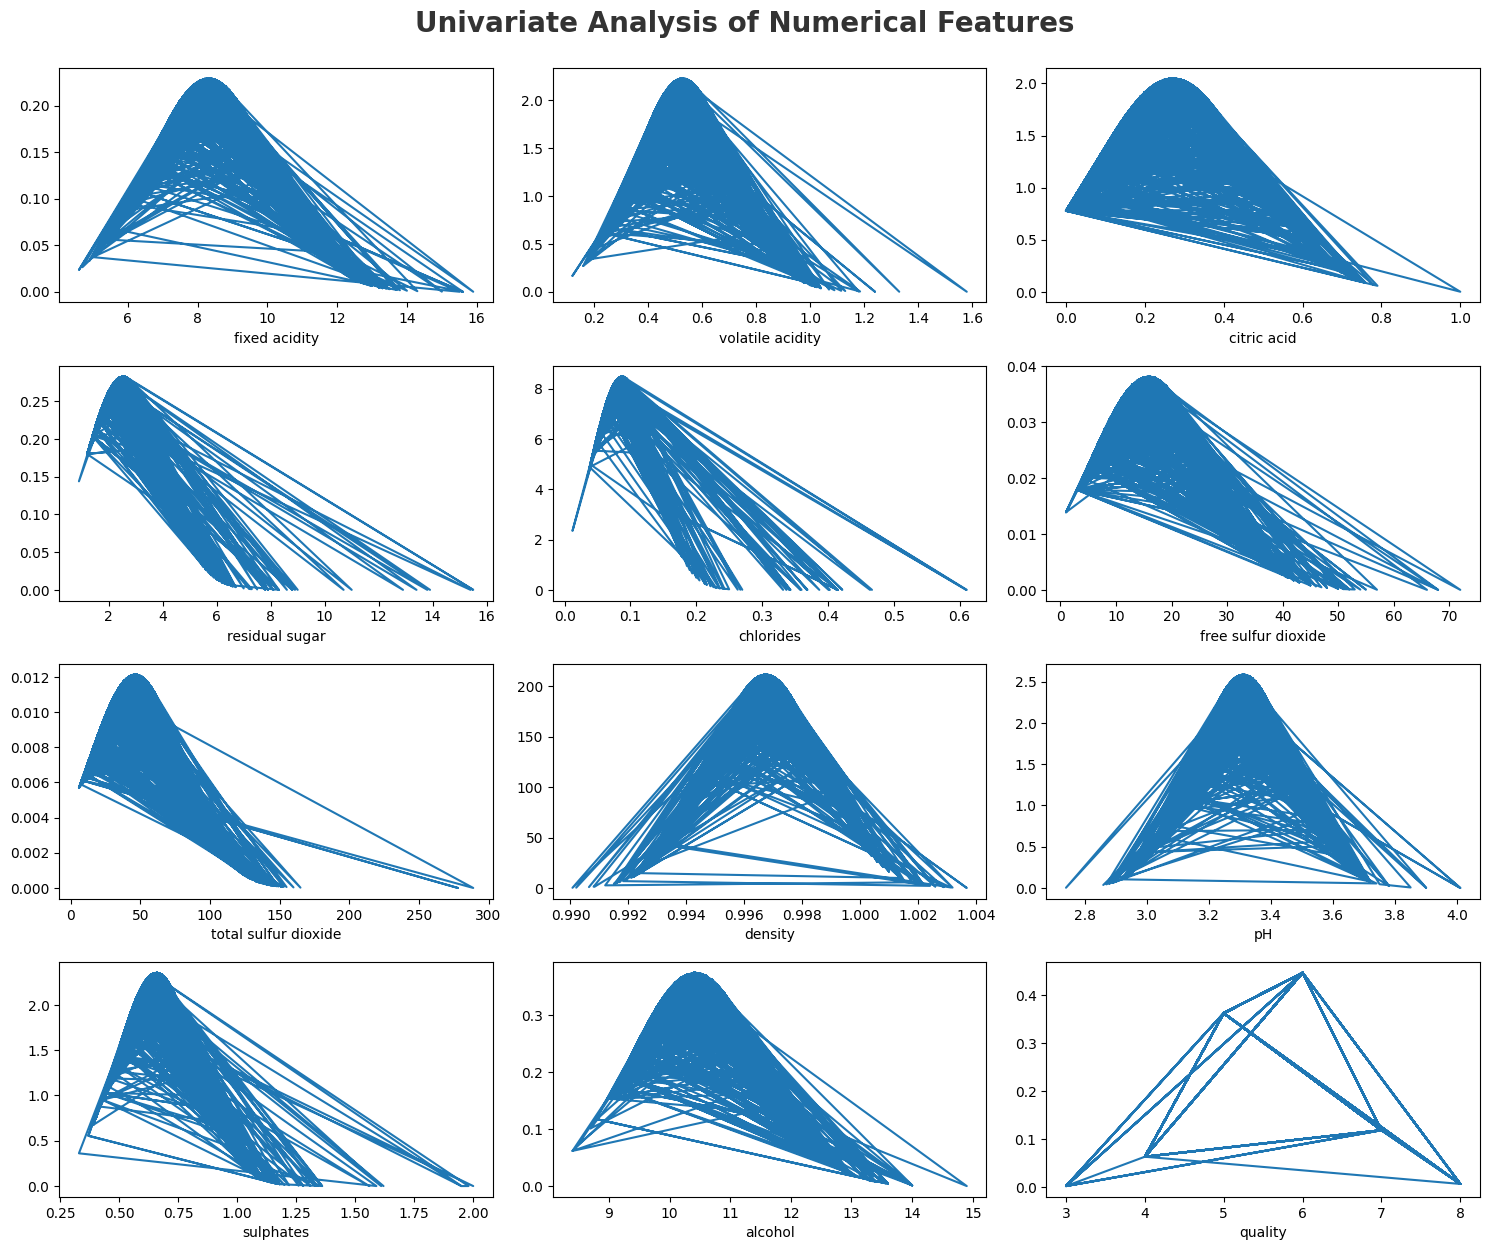

In [27]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    mean=statistics.mean(df[numerical_features[i]])
    sd = statistics.stdev(df[numerical_features[i]])
    # sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.plot(df[numerical_features[i]], norm.pdf(df[numerical_features[i]], mean, sd))
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data.

To perform PCA on the wine quality dataset and determine the minimum number of principal components required to explain 90% of the variance, we need to follow these steps:

1. Load and preprocess the data.
2. Standardize the features.
3. Perform PCA.
4. Calculate the cumulative explained variance.
5. Determine the number of components required to explain at least 90% of the variance.

Let's proceed with the implementation.

### Step 1: Load and Preprocess the Data
We'll first load the wine quality dataset. The dataset is commonly available in CSV format, containing various features related to wine characteristics and quality.

### Step 2: Standardize the Features
Standardizing the features is important for PCA because it ensures that each feature contributes equally to the analysis.

### Step 3: Perform PCA
We will apply PCA to the standardized data to reduce the dimensionality.

### Step 4: Calculate the Cumulative Explained Variance
We will calculate how much variance each principal component explains and find the cumulative variance explained by the components.

### Step 5: Determine the Number of Components
We will identify the minimum number of principal components required to explain at least 90% of the variance.

Let's implement these steps using Python.

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the wine quality dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(data_url, delimiter=';')

# Standardize the features
scaler = StandardScaler()
scaled_wine_data = scaler.fit_transform(wine_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_wine_data)

# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Determine the number of components to explain at least 90% variance
num_components_90_variance = next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= 0.90) + 1

print("Number of principal components to explain 90% variance:", num_components_90_variance)


Number of principal components to explain 90% variance: 8



Here are the detailed steps:

1. **Loading the Dataset**: The dataset is loaded from the specified URL using `pandas.read_csv()`.
2. **Standardizing the Features**: Standardization is done using `StandardScaler` from `sklearn.preprocessing` to ensure each feature has a mean of 0 and a standard deviation of 1.
3. **Performing PCA**: PCA is applied to the standardized data using `PCA` from `sklearn.decomposition`.
4. **Cumulative Explained Variance**: The cumulative explained variance is calculated using the `explained_variance_ratio_` attribute of the fitted PCA object.
5. **Finding the Number of Components**: The minimum number of components needed to explain at least 90% of the variance is found by iterating through the cumulative explained variance and identifying the point where it first exceeds 90%.

Running this code will give you the number of principal components required to explain 90% of the variance in the wine quality dataset.